In [1]:
import torch
from torchvision.transforms import functional as TF

import legacy
from training import networks

In [2]:
def load_g(path):
    g_orig = legacy.load_network_pkl(open(path, 'rb'))['G_ema']
    g = networks.Generator(*g_orig.init_args, **g_orig.init_kwargs)
    g.eval().requires_grad_(False)
    g.load_state_dict(g_orig.state_dict())
    return g

g = load_g('ffhq.pkl')

In [3]:
torch.manual_seed(10)
z = torch.randn([2, 512])
w = g.mapping(z, None)
w = w.view([1, 2, 18, 512])

In [4]:
ramp_1 = torch.linspace(8, -8, 1024).sigmoid()[None, None, None, :].repeat_interleave(1024, 2)
ramp_2 = 1 - ramp_1
mask = torch.cat([ramp_1, ramp_2], dim=1)

In [5]:
def synth(w, mask=None):
    return g.synthesis(w, mask, noise_mode='const', force_fp32=True)

out_1 = synth(w[:, 0])
out_2 = synth(w[:, 1])
out_3 = synth(w, mask)

In [6]:
def convert(x):
    return TF.to_pil_image(x[0].add(1).div(2).clamp(0, 1))

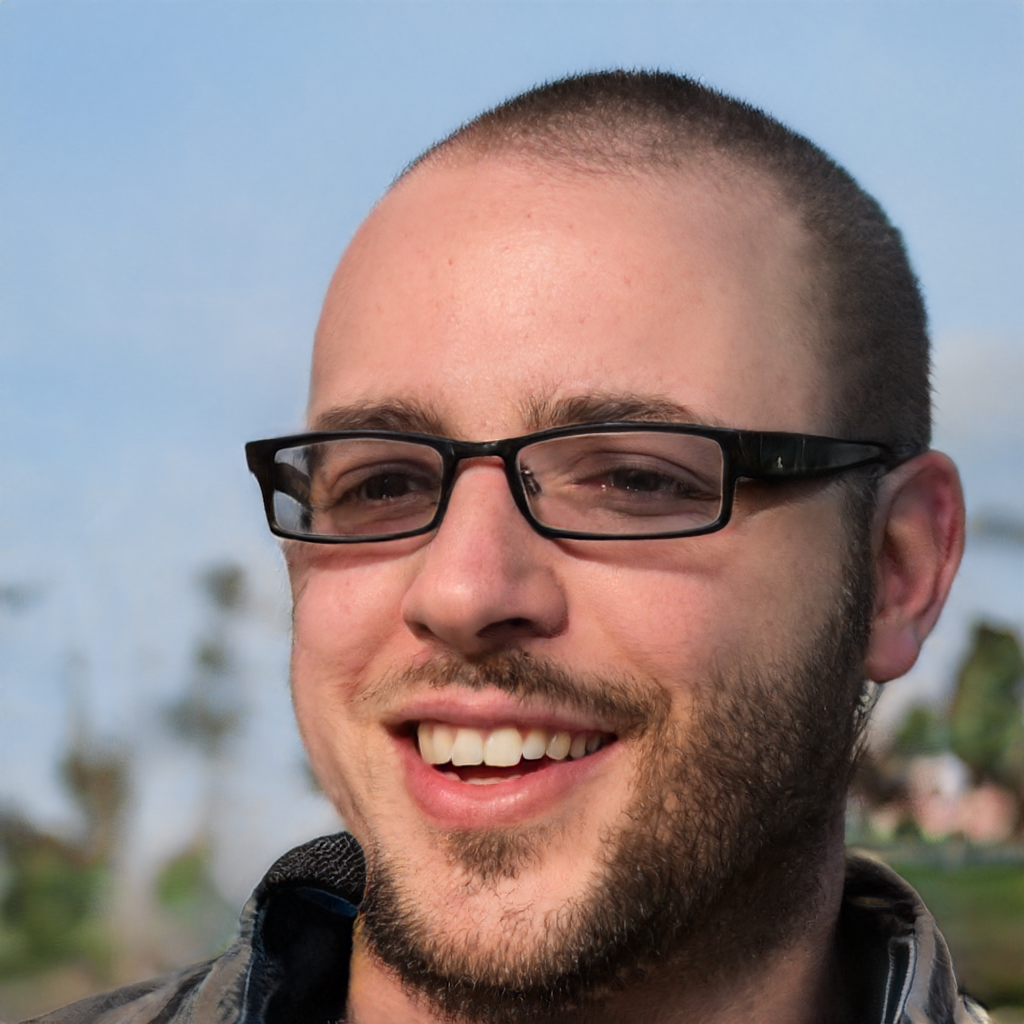

In [7]:
convert(out_1)

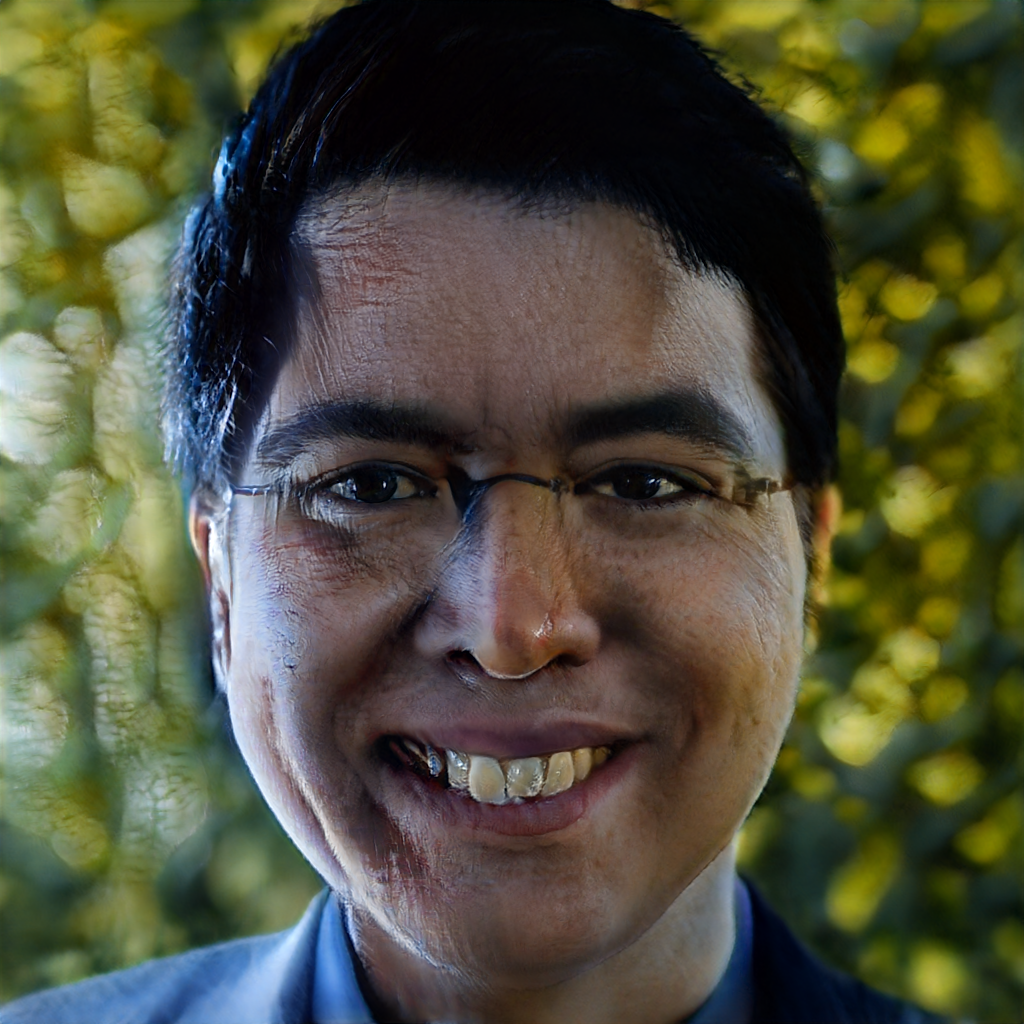

In [8]:
convert(out_2)

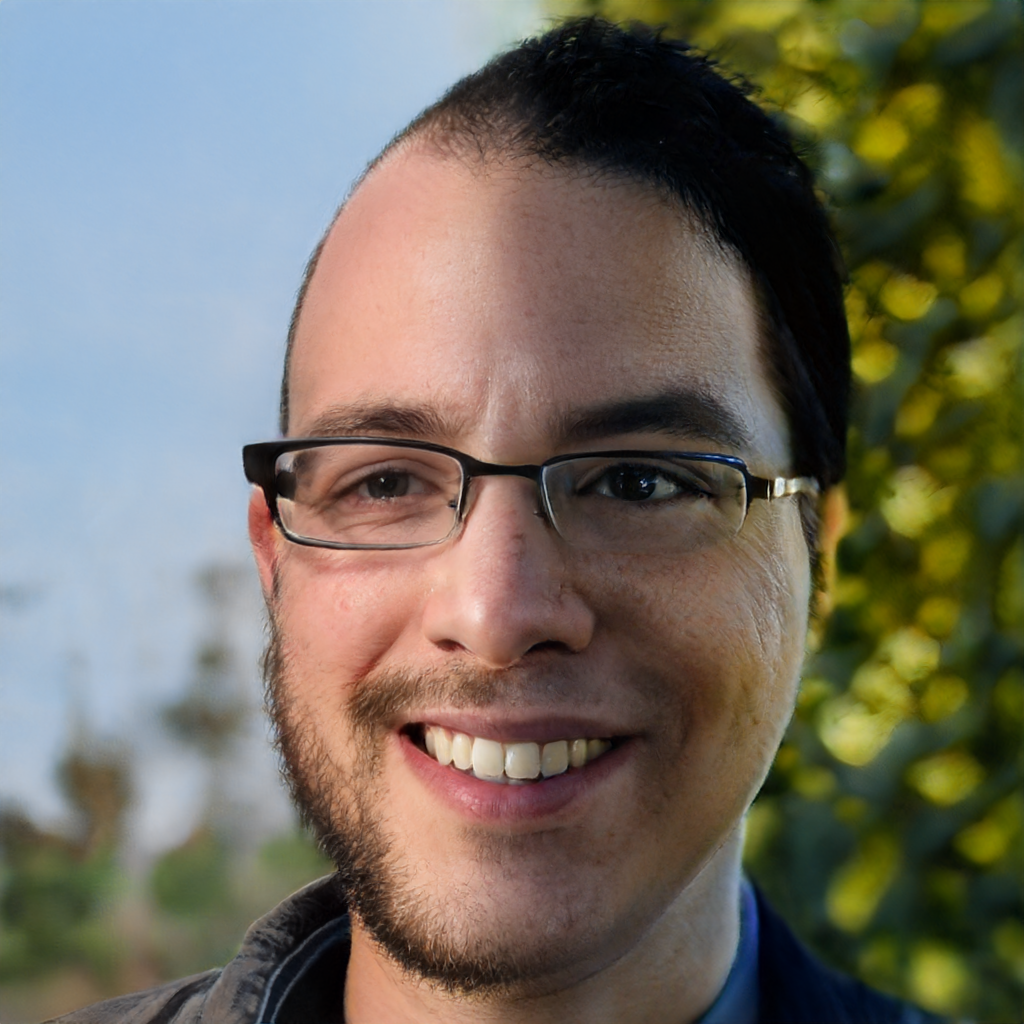

In [9]:
convert(out_3)